<a href="https://colab.research.google.com/github/RMottram/2D-CNN/blob/master/Network_signals_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Nov 12 10:19:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# !unzip /content/drive/MyDrive/Colab\ Notebooks/64x64.zip > /dev/null
# !unzip /content/drive/MyDrive/Colab\ Notebooks/32x32.zip > /dev/null
# !unzip /content/drive/MyDrive/Colab\ Notebooks/split_images.zip > /dev/null
# !unzip /content/drive/MyDrive/Colab\ Notebooks/datasets_V2.zip > /dev/null
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets_V2_raw.zip > /dev/null

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn, sys, os, time
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
# from keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

# Settings
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
## 80/20
normal_train = pd.read_csv('/content/normal_train_8020_raw_2.csv')
normal_test = pd.read_csv('/content/normal_test_8020_raw_2.csv')
ip_train = pd.read_csv('/content/ip_train_8020_raw_2.csv')
ip_test = pd.read_csv('/content/ip_test_8020_raw_2.csv')
port_train = pd.read_csv('/content/port_train_8020_raw_2.csv')
port_test = pd.read_csv('/content/port_test_8020_raw_2.csv')

## 70/30
# normal_train = pd.read_csv('/content/v2/normal_train_7030.csv')
# normal_test = pd.read_csv('/content/v2/normal_test_7030.csv')
# ip_train = pd.read_csv('/content/v2/ip_train_7030.csv')
# ip_test = pd.read_csv('/content/v2/ip_test_7030.csv')
# port_train = pd.read_csv('/content/v2/port_train_7030.csv')
# port_test = pd.read_csv('/content/v2/port_test_7030.csv')

## 60/40
# normal_train = pd.read_csv('/content/v2/normal_train_6040.csv')
# normal_test = pd.read_csv('/content/v2/normal_test_6040.csv')
# ip_train = pd.read_csv('/content/v2/ip_train_6040.csv')
# ip_test = pd.read_csv('/content/v2/ip_test_6040.csv')
# port_train = pd.read_csv('/content/v2/port_train_6040.csv')
# port_test = pd.read_csv('/content/v2/port_test_6040.csv')


In [9]:
normal_train.head()

duration  src_bytes  dst_bytes    land  wrong_fragment  urgent     hot  \
0   0.00000  350.00000  300.00000 0.00000         0.00000 0.00000 0.00000   
1   0.00000  212.00000 5383.00000 0.00000         0.00000 0.00000 0.00000   
2   0.00000 1830.00000    0.00000 0.00000         0.00000 0.00000 0.00000   
3   0.00000  337.00000 1173.00000 0.00000         0.00000 0.00000 0.00000   
4   0.00000  383.00000    0.00000 0.00000         0.00000 0.00000 0.00000   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0            0.00000    1.00000          0.00000     0.00000       0.00000   
1            0.00000    1.00000          0.00000     0.00000       0.00000   
2            0.00000    1.00000          0.00000     0.00000       0.00000   
3            0.00000    1.00000          0.00000     0.00000       0.00000   
4            0.00000    0.00000          0.00000     0.00000       0.00000   

   num_root  num_file_creations  num_shells  num_access_files  \
0   0.00000             0.00000     0.00000           0.00000   
1   0.00000             0.00000     0.00000           0.00000   
2   0.00000             0.00000     0.00000           0.00000   
3   0.00000             0.00000     0.00000           0.00000   
4   0.00000             0.00000     0.00000           0.00000   

   num_outbound_cmds  is_host_login  is_guest_login    count  srv_count  \
0            0.00000        0.00000         0.00000 11.00000   11.00000   
1            0.00000        0.00000         0.00000  6.00000    6.00000   
2            0.00000        0.00000         0.00000  7.00000    7.00000   
3            0.00000        0.00000         0.00000  8.00000    8.00000   
4            0.00000        0.00000         0.00000  2.00000    2.00000   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0      0.00000          0.00000      0.00000          0.00000        1.00000   
1      0.00000          0.00000      0.00000          0.00000        1.00000   
2      0.00000          0.00000      0.00000          0.00000        1.00000   
3      0.00000          0.00000      0.00000          0.00000        1.00000   
4      0.00000          0.00000      0.00000          0.00000        1.00000   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0        0.00000             0.00000       255.00000           255.00000   
1        0.00000             0.00000         6.00000           255.00000   
2        0.00000             0.00000       146.00000            41.00000   
3        0.00000             0.00000       255.00000           255.00000   
4        0.00000             0.00000        35.00000             3.00000   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                 1.00000                 0.00000   
1                 1.00000                 0.00000   
2                 0.28000                 0.03000   
3                 1.00000                 0.00000   
4                 0.09000                 0.09000   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                      0.00000                      0.00000   
1                      0.17000                      0.04000   
2                      0.28000                      0.00000   
3                      0.00000                      0.00000   
4                      0.09000                      0.00000   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0               0.00000                   0.00000               0.00000   
1               0.00000                   0.00000               0.00000   
2               0.00000                   0.00000               0.01000   
3               0.00000                   0.00000               0.00000   
4               0.00000                   0.00000               0.00000   

   dst_host_srv_rerror_rate    icmp     tcp     udp     IRC     X11  Z39_50  \
0                   0.00000 0.00000 1.00000 0.00000 0.00000 0.0

In [45]:
## merging the appropriate datasets together
normal_ip_train = normal_train.append(ip_train)
normal_ip_test = normal_test.append(ip_test)

normal_port_train = normal_train.append(port_train)
normal_port_test = normal_test.append(port_test)

ip_port_train = ip_train.append(port_train)
ip_port_test = ip_test.append(port_test)

all_three_train = normal_train.append([ip_train, port_train])
all_three_test = normal_test.append([ip_test, port_test])

In [11]:
normal_ip_train

duration  src_bytes  dst_bytes    land  wrong_fragment  urgent  \
0        0.00000  350.00000  300.00000 0.00000         0.00000 0.00000   
1        0.00000  212.00000 5383.00000 0.00000         0.00000 0.00000   
2        0.00000 1830.00000    0.00000 0.00000         0.00000 0.00000   
3        0.00000  337.00000 1173.00000 0.00000         0.00000 0.00000   
4        0.00000  383.00000    0.00000 0.00000         0.00000 0.00000   
...          ...        ...        ...     ...             ...     ...   
195323   0.00000   18.00000    0.00000 0.00000         0.00000 0.00000   
195324   0.00000   18.00000    0.00000 0.00000         0.00000 0.00000   
195325   0.00000   18.00000    0.00000 0.00000         0.00000 0.00000   
195326   0.00000   18.00000    0.00000 0.00000         0.00000 0.00000   
195327   0.00000   18.00000    0.00000 0.00000         0.00000 0.00000   

           hot  num_failed_logins  logged_in  num_compromised  root_shell  \
0      0.00000            0.00000    1.00000          0.00000     0.00000   
1      0.00000            0.00000    1.00000          0.00000     0.00000   
2      0.00000            0.00000    1.00000          0.00000     0.00000   
3      0.00000            0.00000    1.00000          0.00000     0.00000   
4      0.00000            0.00000    0.00000          0.00000     0.00000   
...        ...                ...        ...              ...         ...   
195323 0.00000            0.00000    0.00000          0.00000     0.00000   
195324 0.00000            0.00000    0.00000          0.00000     0.00000   
195325 0.00000            0.00000    0.00000          0.00000     0.00000   
195326 0.00000            0.00000    0.00000          0.00000     0.00000   
195327 0.00000            0.00000    0.00000          0.00000     0.00000   

        su_attempted  num_root  num_file_creations  num_shells  \
0            0.00000   0.00000             0.00000     0.00000   
1            0.00000   0.00000             0.00000     0.00000   
2            0.00000   0.00000             0.00000     0.00000   
3            0.00000   0.00000             0.00000     0.00000   
4            0.00000   0.00000             0.00000     0.00000   
...              ...       ...                 ...         ...   
195323       0.00000   0.00000             0.00000     0.00000   
195324       0.00000   0.00000             0.00000     0.00000   
195325       0.00000   0.00000             0.00000     0.00000   
195326       0.00000   0.00000             0.00000     0.00000   
195327       0.00000   0.00000             0.00000     0.00000   

        num_access_files  num_outbound_cmds  is_host_login  is_guest_login  \
0                0.00000            0.00000        0.00000         0.00000   
1                0.00000            0.00000        0.00000         0.00000   
2                0.00000            0.00000        0.00000         0.00000   
3                0.00000            0.00000        0.00000         0.00000   
4                0.00000            0.00000        0.00000         0.00000   
...                  ...                ...            ...             ...   
195323           0.00000            0.00000        0.00000         0.00000   
195324           0.00000            0.00000        0.00000         0.00000   
195325           0.00000            0.00000        0.00000         0.00000   
195326           0.00000            0.00000        0.00000         0.00000   
195327           0.00000            0.00000        0.00000         0.00000   

          count  srv_count  serror_rate  srv_serror_rate  rerror_rate  \
0      11.00000   11.00000      0.00000          0.00000      0.00000   
1       6.00000    6.00000      0.00000          0.00000      0.00000   
2       7.00000    7.00000      0.00000          0.00000      0.00000   
3       8.00000    8.00000      0.00000          0.00000      0.00000   
4       2.00000    2.00000      0.00000          0.00000      0.00000   
...         ...        ...

In [46]:
normal_ip_train_class = pd.Series(normal_ip_train.iloc[:,-1])
normal_ip_test_class = pd.Series(normal_ip_test.iloc[:,-1])

normal_port_train_class = pd.Series(normal_port_train.iloc[:,-1])
normal_port_test_class = pd.Series(normal_port_test.iloc[:,-1])

ip_port_train_class = pd.Series(ip_port_train.iloc[:,-1])
ip_port_test_class = pd.Series(ip_port_test.iloc[:,-1])

all_three_train_class = pd.Series(all_three_train.iloc[:,-1])
all_three_test_class = pd.Series(all_three_test.iloc[:,-1])

In [13]:
normal_ip_train_class

pd.get_dummies(ip_port_train_class)

ipsweep  portsweep
0            1          0
1            1          0
2            1          0
3            1          0
4            1          0
...        ...        ...
63893        0          1
63894        0          1
63895        0          1
63896        0          1
63897        0          1

[259226 rows x 2 columns]

In [47]:
normal_ip_train = normal_ip_train.drop(['attack_type'], axis = 1)
normal_ip_test = normal_ip_test.drop(['attack_type'], axis = 1)

normal_port_train = normal_port_train.drop(['attack_type'], axis = 1)
normal_port_test = normal_port_test.drop(['attack_type'], axis = 1)

ip_port_train = ip_port_train.drop(['attack_type'], axis = 1)
ip_port_test = ip_port_test.drop(['attack_type'], axis = 1)

all_three_train = all_three_train.drop(['attack_type'], axis = 1)
all_three_test = all_three_test.drop(['attack_type'], axis = 1)

In [48]:
## shuffle the data to prevent pattern recognition
normal_ip_train, normal_ip_train_class = sklearn.utils.shuffle(normal_ip_train, normal_ip_train_class, random_state = 42)
normal_port_train, normal_port_train_class = sklearn.utils.shuffle(normal_port_train, normal_port_train_class, random_state = 42)

normal_ip_test, normal_ip_test_class = sklearn.utils.shuffle(normal_ip_test, normal_ip_test_class, random_state = 42)
normal_port_test, normal_port_test_class = sklearn.utils.shuffle(normal_port_test, normal_port_test_class, random_state = 42)

ip_port_train, ip_port_train_class = sklearn.utils.shuffle(ip_port_train, ip_port_train_class, random_state = 42)
ip_port_test, ip_port_test_class = sklearn.utils.shuffle(ip_port_test, ip_port_test_class, random_state = 42)

all_three_train, all_three_train_class = sklearn.utils.shuffle(all_three_train, all_three_train_class, random_state = 42)
all_three_test, all_three_test_class = sklearn.utils.shuffle(all_three_test, all_three_test_class, random_state = 42)

In [49]:
ann = Sequential()

## input layer and hidden layer #1
ann.add(Dense(input_dim = 114, units = 10, kernel_initializer = 'uniform', activation = 'relu'))

## hidden layer #2
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

## hidden layer #3
ann.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

## output layer
ann.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# callback = [EarlyStopping(monitor='accuracy', mode='max', patience=3 )]

ann.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 10)                1150      
                                                                 
 dense_69 (Dense)            (None, 6)                 66        
                                                                 
 dense_70 (Dense)            (None, 4)                 28        
                                                                 
 dense_71 (Dense)            (None, 3)                 15        
                                                                 
Total params: 1,259
Trainable params: 1,259
Non-trainable params: 0
_________________________________________________________________


In [50]:
start = time.time()

model_history = ann.fit(all_three_train, pd.get_dummies(all_three_train_class), batch_size = 1024, epochs = 120)

end = time.time() - start

print(f'Training for ANN took {round(end,3)} seconds')

Epoch 1/120
314/314 [==============================] - 2s 5ms/step - loss: 10.9014 - accuracy: 0.8458
Epoch 2/120
314/314 [==============================] - 2s 5ms/step - loss: 1.2040 - accuracy: 0.9100
Epoch 3/120
314/314 [==============================] - 2s 5ms/step - loss: 0.3681 - accuracy: 0.9584
Epoch 4/120
314/314 [==============================] - 2s 5ms/step - loss: 0.5167 - accuracy: 0.9727
Epoch 5/120
314/314 [==============================] - 1s 5ms/step - loss: 0.6537 - accuracy: 0.9583
Epoch 6/120
314/314 [==============================] - 1s 5ms/step - loss: 0.2034 - accuracy: 0.9627
Epoch 7/120
314/314 [==============================] - 1s 5ms/step - loss: 0.1172 - accuracy: 0.9762
Epoch 8/120
314/314 [==============================] - 1s 5ms/step - loss: 0.0652 - accuracy: 0.9882
Epoch 9/120
314/314 [==============================] - 2s 5ms/step - loss: 0.0375 - accuracy: 0.9921
Epoch 10/120
314/314 [==============================] - 1s 5ms/step - loss: 0.0376 - accur

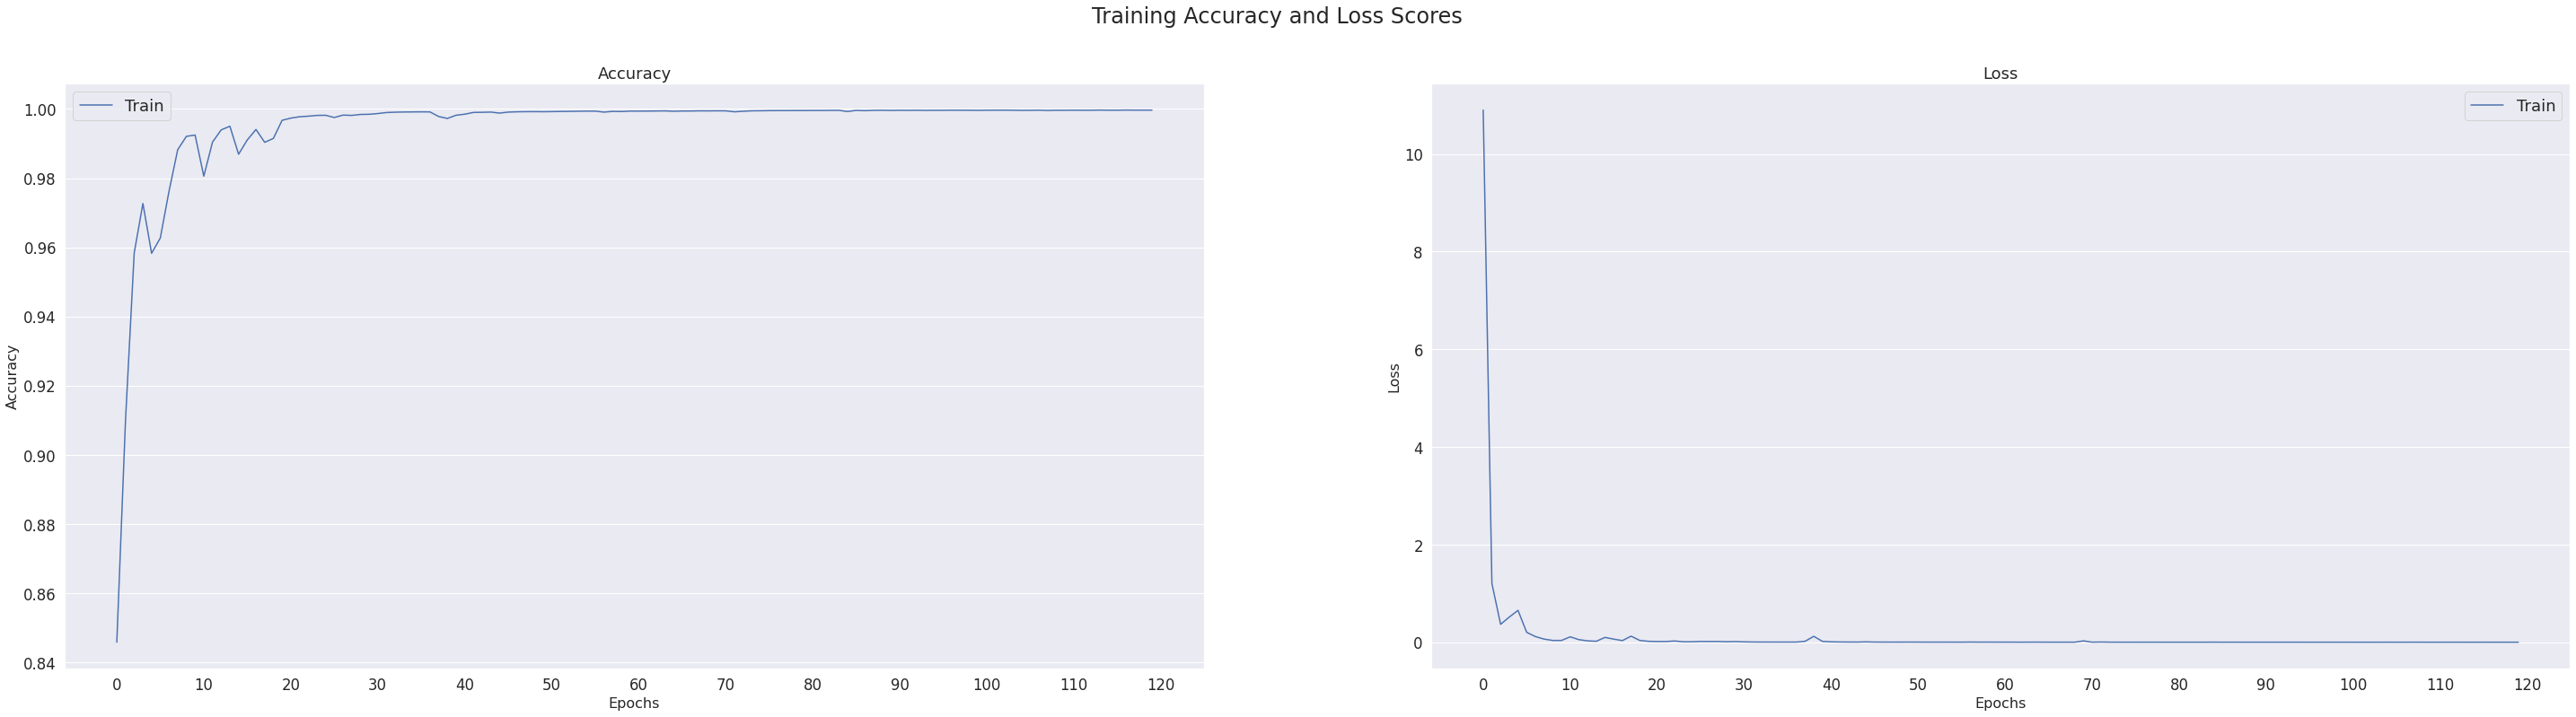

In [51]:
# print(model_history.history.keys())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50,12))
fig.suptitle('Training Accuracy and Loss Scores', fontsize = 24)

axes[0].plot(model_history.history['accuracy'])
axes[0].set_title('Accuracy', fontsize = 18)
axes[0].set_ylabel('Accuracy', fontsize = 16)
axes[0].set_xlabel('Epochs', fontsize = 16)
axes[0].set_xticks(np.arange(0, 130, step = 10))
axes[0].grid(axis = 'x')
axes[0].legend(['Train', 'Test'], loc = 'best', fontsize = 18)

axes[1].plot(model_history.history['loss'])
axes[1].set_title('Loss', fontsize = 18)
axes[1].set_ylabel('Loss', fontsize = 16)
axes[1].set_xlabel('Epochs', fontsize = 16)
axes[1].set_xticks(np.arange(0, 130, step = 10))
axes[1].grid(axis = 'x')
axes[1].legend(['Train', 'Test'], loc = 'best', fontsize = 18)

In [52]:
loss, acc = ann.evaluate(all_three_test, pd.get_dummies(all_three_test_class), batch_size=1024, verbose=0)
print(f'Loss = {round(loss, 3)}\tAccuracy = {round(acc, 4)*100}%')

Loss = 0.002	Accuracy = 99.97%


In [53]:
preds = (ann.predict(pd.get_dummies(all_three_test)) > 0.5)

In [54]:
preds

array([[False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [Fa

In [55]:
def build_classifier():
    
    ann = Sequential()
    ann.add(Dense(input_dim = 114, units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    ann.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))
    ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return ann

clf = KerasClassifier(build_fn = build_classifier, batch_size = 1024, epochs = 120)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if sys.path[0] == '':


In [56]:
start = time.time()
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, random_state = None)
score = cross_val_score(clf, all_three_test, pd.get_dummies(all_three_test_class), cv = kf)
print(f'Model Cross Validation Score - {round(score.mean(), 3)*100}%')
print(f'Model Cross Validation Scores - {score}')
print(f'Model Cross Validation standard deviation - {round(score.std(), 3)*100}')
end = time.time() - start


Epoch 1/120
63/63 [==============================] - 1s 5ms/step - loss: 1.0964 - accuracy: 0.7508
Epoch 2/120
63/63 [==============================] - 0s 5ms/step - loss: 45.8766 - accuracy: 0.9787
Epoch 3/120
63/63 [==============================] - 0s 5ms/step - loss: 34.9752 - accuracy: 0.9817
Epoch 4/120
63/63 [==============================] - 0s 5ms/step - loss: 11.9784 - accuracy: 0.9852
Epoch 5/120
63/63 [==============================] - 0s 5ms/step - loss: 0.5016 - accuracy: 0.9844
Epoch 6/120
63/63 [==============================] - 0s 5ms/step - loss: 0.6484 - accuracy: 0.9857
Epoch 7/120
63/63 [==============================] - 0s 5ms/step - loss: 0.7419 - accuracy: 0.9809
Epoch 8/120
63/63 [==============================] - 0s 5ms/step - loss: 0.6565 - accuracy: 0.9824
Epoch 9/120
63/63 [==============================] - 0s 5ms/step - loss: 0.5767 - accuracy: 0.9829
Epoch 10/120
63/63 [==============================] - 0s 5ms/step - loss: 0.5016 - accuracy: 0.9837
Epoch 

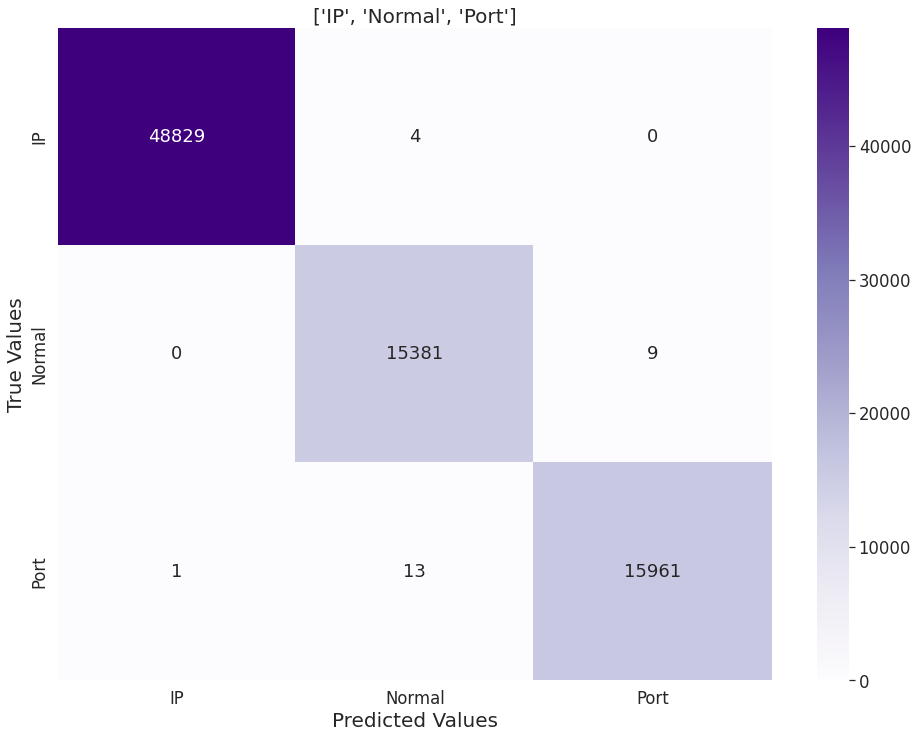

              precision    recall  f1-score   support

          IP       1.00      1.00      1.00     48833
      Normal       1.00      1.00      1.00     15390
        Port       1.00      1.00      1.00     15975

   micro avg       1.00      1.00      1.00     80198
   macro avg       1.00      1.00      1.00     80198
weighted avg       1.00      1.00      1.00     80198
 samples avg       1.00      1.00      1.00     80198



In [57]:
targets = ['IP', 'Normal', 'Port']
cr = classification_report(pd.get_dummies(all_three_test_class), preds, target_names=targets, zero_division=0)
cm = confusion_matrix(pd.get_dummies(all_three_test_class).values.argmax(axis = 1), preds.argmax(axis = 1))

cm_df = pd.DataFrame(cm,
                     index = targets, 
                     columns = targets)


plt.figure(figsize=(16,12))
sns.set(font_scale=1.5)
sns.heatmap(cm_df, annot=True, cmap = 'Purples', fmt='1')
plt.title(targets, fontsize = '20')
plt.ylabel('True Values', fontsize = '20')
plt.xlabel('Predicted Values', fontsize = '20')
plt.show()

print(cr)

In [58]:
def perf_measure(y_actual, y_pred, labels):
    labels = targets
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return(print(f'{labels}\nTP - {TP}\nFP - {FP}\nTN - {TN}\nFN - {FN}'))


perf_measure(pd.get_dummies(all_three_test_class).values.argmax(axis = 1), preds.argmax(axis = 1), targets)

['IP', 'Normal', 'Port']
TP - [48829, 15381, 15961]
FP - [1, 17, 9]
TN - [31342, 64790, 64210]
FN - [26, 10, 18]
